In [71]:
!pip install tensorflow

In [72]:
import tensorflow as tf
print(tf.__version__)

2.19.0


In [73]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [74]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [75]:
# divide dataset in indepemdent and dependent features
X = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [76]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [77]:
# feature engineer
geography=pd.get_dummies(X['Geography'], drop_first=True)
gender= pd.get_dummies(X['Gender'], drop_first=True)

In [78]:
# concatenate these variables w dataframe
X=X.drop(['Geography','Gender'], axis=1)

In [79]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [80]:
X=pd.concat([X,geography,gender],axis=1)

In [81]:
# splitting data in train test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [82]:
# fearture scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [83]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [84]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [85]:
X_train.shape

(8000, 11)

In [86]:
# part 2(creating ann)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout

In [87]:
# initialize ann
classifier = Sequential()

In [88]:
# adding i/p layer
classifier.add(Dense(units=1,activation='relu'))

In [103]:
# add 1st hidden layer
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.3))

In [90]:
# add 2nd hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [91]:
# add o/p layer
classifier.add(Dense(1,activation='sigmoid'))

In [93]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [92]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [94]:
# early stopping
import tensorflow as tf
# from tensorflow import keras
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [95]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000, callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7875 - loss: 0.5244 - val_accuracy: 0.7955 - val_loss: 0.4508
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7979 - loss: 0.4459 - val_accuracy: 0.7955 - val_loss: 0.4443
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7987 - loss: 0.4461 - val_accuracy: 0.7955 - val_loss: 0.4407
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8003 - loss: 0.4454 - val_accuracy: 0.7955 - val_loss: 0.4492
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7908 - loss: 0.4470 - val_accuracy: 0.7955 - val_loss: 0.4437
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7963 - loss: 0.4373 - val_accuracy: 0.7955 - val_loss: 0.4527
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7957 - loss: 0.4357 - val_accuracy: 0.7955 - val_loss: 0.4401
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7982 - loss: 0.4341 - 

In [96]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

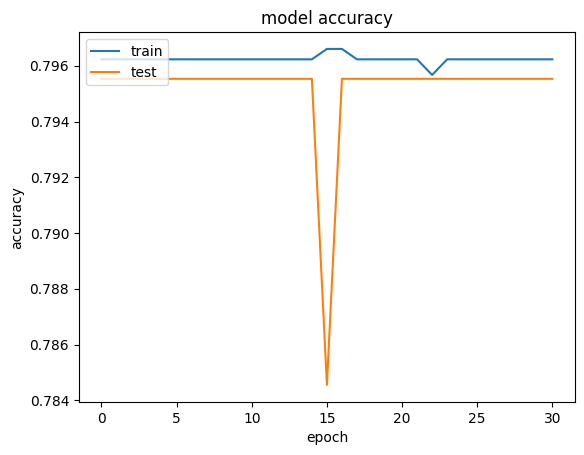

In [97]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

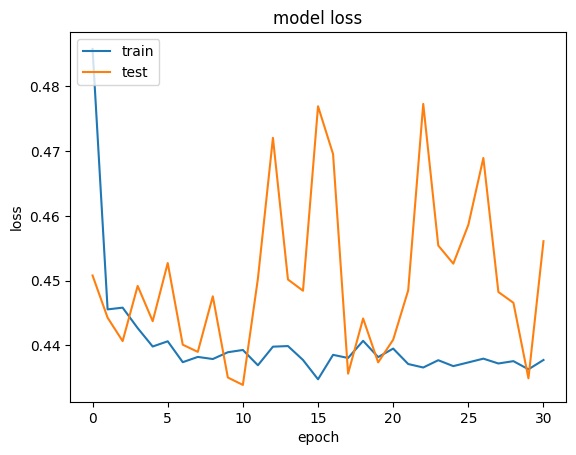

In [98]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [99]:
# part3 making prediction and evaluating model

# predicting the test set result
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [100]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1595,    0],
       [ 405,    0]])

In [101]:
# calc the accuracy
from sklearn.metrics  import accuracy_score
score = accuracy_score(y_pred, y_test)
score

0.7975

In [102]:
# weights
classifier.get_weights()

[array([[ 0.28072125],
        [-2.2219715 ],
        [ 0.12256692],
        [-0.34507078],
        [ 0.10916129],
        [-0.037596  ],
        [ 0.6815282 ],
        [-0.09924135],
        [-0.85218805],
        [-0.18493615],
        [ 0.5714548 ]], dtype=float32),
 array([2.6864986], dtype=float32),
 array([[-0.56539655, -0.8445196 ,  0.68252766, -0.6031533 , -0.7436298 ,
          0.47583464,  1.062374  ]], dtype=float32),
 array([ 0.        ,  0.        , -0.41897434,  0.        ,  0.        ,
        -0.32303455,  0.24445702], dtype=float32),
 array([[ 0.4698075 ,  0.20194101, -0.23771301,  0.24643058, -0.03610617,
         -0.45649844],
        [ 0.50655234, -0.6011199 , -0.20505363, -0.63464516, -0.02108443,
         -0.6260034 ],
        [-0.39624396,  0.04480792, -0.34221408,  0.9626445 , -0.92835927,
         -1.7635394 ],
        [-0.19552359, -0.3817687 , -0.2244825 , -0.6699445 ,  0.5322677 ,
         -0.14652383],
        [-0.45139337,  0.05626297, -0.12030858,  0.3606

## Observations

- The model shows ~79% accuracy, but the confusion matrix indicates class imbalance.
- The model tends to predict the majority class.
- This highlights why accuracy alone is not a reliable metric.
- Future improvements: class weighting, ROC-AUC, precision-recall analysis.
